# Filtering neural signals using neurodsp.filt

This notebook shows how to use the neurodsp module to filter neural signals. It is broken down into the following sections:

1. Bandpass filter - extract a single oscillator from your signal
2. Highpass, lowpass, and bandstop filters - remove power in unwanted frequency ranges
3. Time-frequency resolution tradeoff - Change the filter length, N_cycles and N_taps
4. Infinite-impulse-response (IIR) filter option.
5. Beta bandpass filter on a neural signal

In [1]:
import numpy as np
from neurodsp import filt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Bandpass filter
Extract signal within a specific frequency range (e.g. theta, 4-8Hz)

Transition bandwidth is 2.0 Hz. Pass/stop bandwidth is 4 Hz


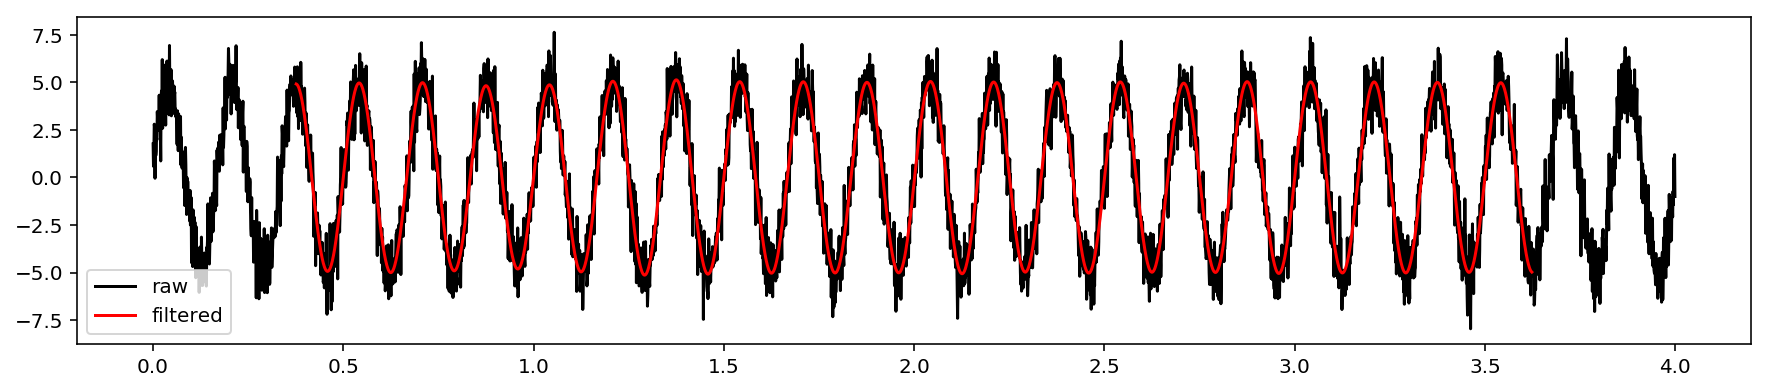

In [2]:
# Generate an oscillation with noise
np.random.seed(0)
t = np.arange(0,4,.001)
x = np.random.randn(len(t)) + 5*np.sin(t*2*np.pi*6)
fs = 1000

# Define the frequency band of interest
fc = (4,8)

# Filter the data
x_filt = filt.filter_signal(x, fs, 'bandpass', fc)

# Plot filtered signal
plt.figure(figsize=(15,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')

Notice that the edges of the filtered signal are clipped (no red). Edge artifact removal is done by default in `filter_signal()`, because the signal samples at the edges only experienced part of the filter. As the saying goes, 99% of a filter is not a filter.

To bypass this feature, set `remove_edge_artifacts=False`, but at your own risk!

# 2. Highpass, lowpass, and bandstop filters

### 2a. Highpass filter
Remove low frequency drift from the data

Transition bandwidth is 1.0 Hz. Pass/stop bandwidth is 498.0 Hz


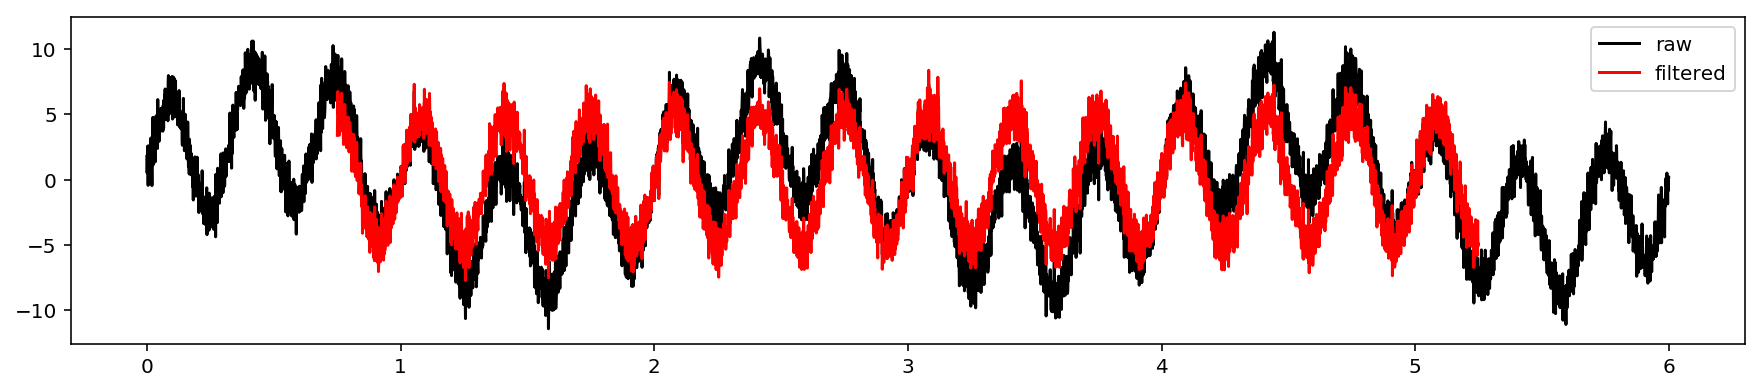

In [3]:
# Generate a signal with a low-frequency drift
np.random.seed(0)
t = np.arange(0,6,.001)
x = np.random.randn(len(t)) + 5*np.sin(t*2*np.pi*3) + 4*np.sin(t*2*np.pi*.5)

# Filter the data
fc = 2
x_filt = filt.filter_signal(x, fs, 'highpass', (fc,None))

# Plot filtered signal
plt.figure(figsize=(15,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')

### 2b. Lowpass filter
Remove high frequency noise from the data

Transition bandwidth is 8.8 Hz. Pass/stop bandwidth is 20 Hz


/Users/rdgao/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


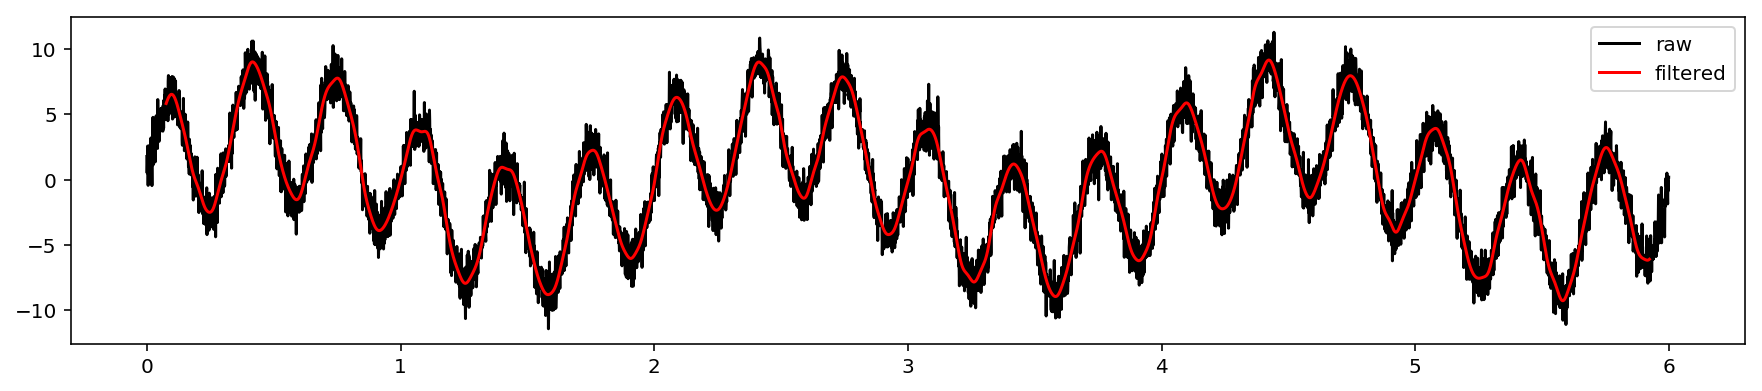

In [4]:
# Generate a signal with a low-frequency drift
np.random.seed(0)
t = np.arange(0,6,.001)
x = np.random.randn(len(t)) + 5*np.sin(t*2*np.pi*3) + 4*np.sin(t*2*np.pi*.5)

# Filter the data
fc = 20
x_filt = filt.filter_signal(x, fs, 'lowpass', (None,fc))

# Plot filtered signal
plt.figure(figsize=(15,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')

### 2c. Bandstop filter
Remove 60Hz noise from the data

* Notice that it is necessary to set a nondefault filter length because a filter of length 3 cycles of a 58Hz oscillation would not attenuate the 60Hz oscillation much (try this yourself!).

/Users/rdgao/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)
/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp-1.0.0-py3.6.egg/neurodsp/filt.py:191: UserWarning: The filter attenuation never goes below -20dB. Increase filter length.
  warnings.warn("The filter attenuation never goes below -20dB. "\


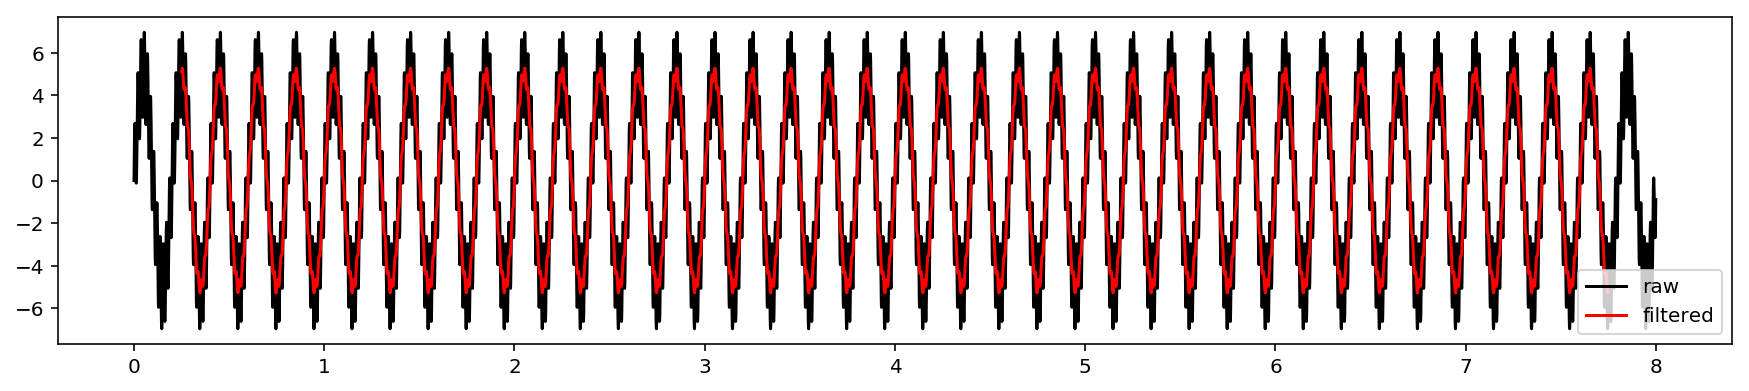

In [5]:
# Generate a signal with a low-frequency drift
np.random.seed(0)
t = np.arange(0,8,.001)
x = 5*np.sin(t*2*np.pi*5) + 2*np.sin(t*2*np.pi*60)

# Filter the data
fc = (58, 62)
x_filt = filt.filter_signal(x, fs, 'bandstop', fc=fc, n_seconds=0.5)

# Plot filtered signal
plt.figure(figsize=(15,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')

/Users/rdgao/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)
/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp-1.0.0-py3.6.egg/neurodsp/filt.py:191: UserWarning: The filter attenuation never goes below -20dB. Increase filter length.
  warnings.warn("The filter attenuation never goes below -20dB. "\


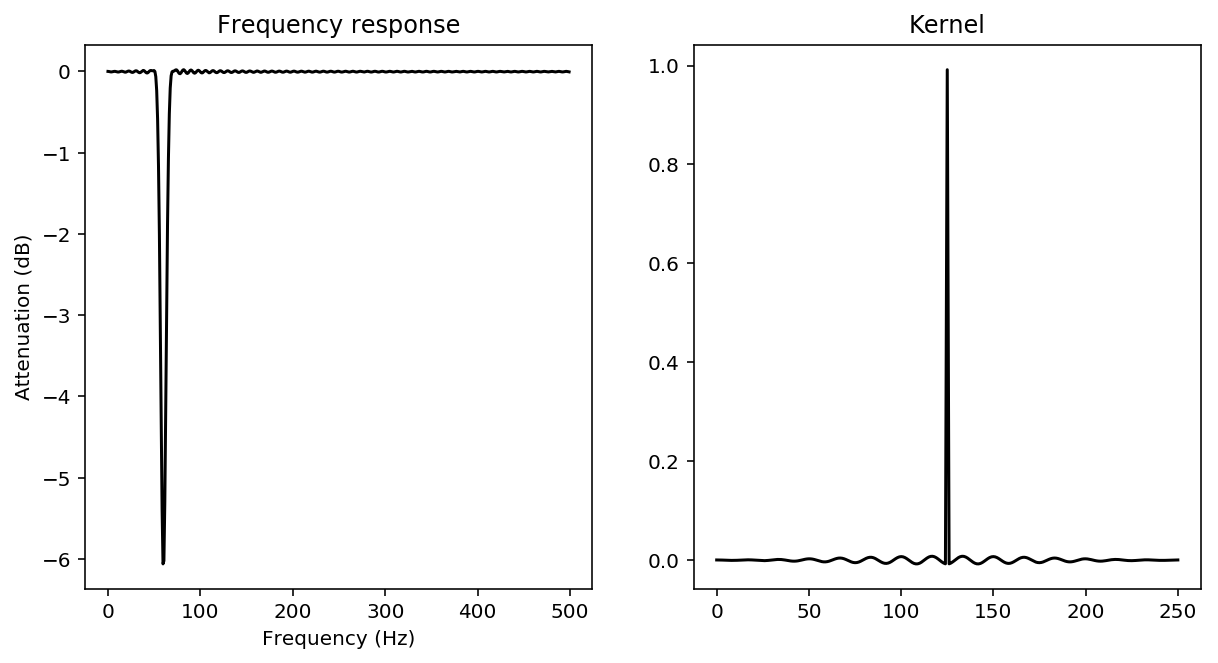

In [6]:
# Note the user warning above.
# This is because in the computed frequency response (below), the attenuation in the stopband does not go below 20dB.
x_filt = filt.filter_signal(x, fs, 'bandstop', fc=fc, n_seconds=0.25, plot_freq_response=True)

Transition bandwidth is 2.0 Hz. Pass/stop bandwidth is 4 Hz


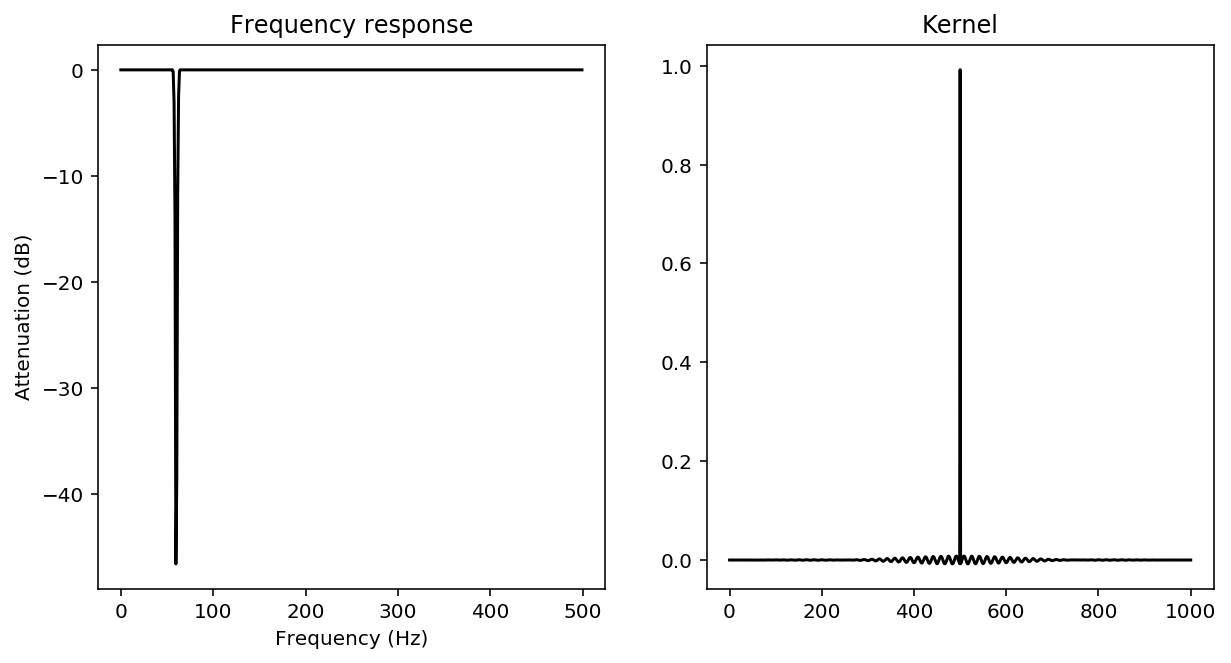

In [7]:
# This user warning disappears if we elongate the filter
x_filt = filt.filter_signal(x, fs, 'bandstop', fc=fc, n_seconds=1, plot_freq_response=True)

# 3. Time-frequency resolution tradeoff

With longer filter kernels, we get improved frequency resolution, but worse time resolution

### Two bandpass filters (one long and one short)

Notice that the short filter preserves the start of the oscillation better than the long filter (i.e. better time resolution).

Notice that the long filter correctly removed the 1Hz oscillation, but the short filter did not (i.e. better frequency resolution).

In [8]:
# Generate an oscillation with noise
np.random.seed(0)
t = np.arange(0,3,.01)
x = np.random.randn(len(t))*.3 + 5*np.sin(t*2*np.pi*6) + 4*np.sin(t*2*np.pi*1)
fs = 100

# Set the first second to 0
x[:fs] = 0

# Define the frequency band of interest
fc = (4, 8)

Transition bandwidth is 9.9 Hz. Pass/stop bandwidth is 4 Hz
Transition bandwidth is 1.4 Hz. Pass/stop bandwidth is 4 Hz


/Users/rdgao/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)
/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp-1.0.0-py3.6.egg/neurodsp/filt.py:198: UserWarning: The low frequency stopband never gets attenuatedby more than 20dB. Increase filter length.
  warnings.warn("The low frequency stopband never gets attenuated"\
/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp-1.0.0-py3.6.egg/neurodsp/filt.py:201: UserWarning: The high frequency stopband never gets attenuatedby more than 20dB. Increase filter length.
  warnings.warn("The high frequency stopband never gets attenuated"\
/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp

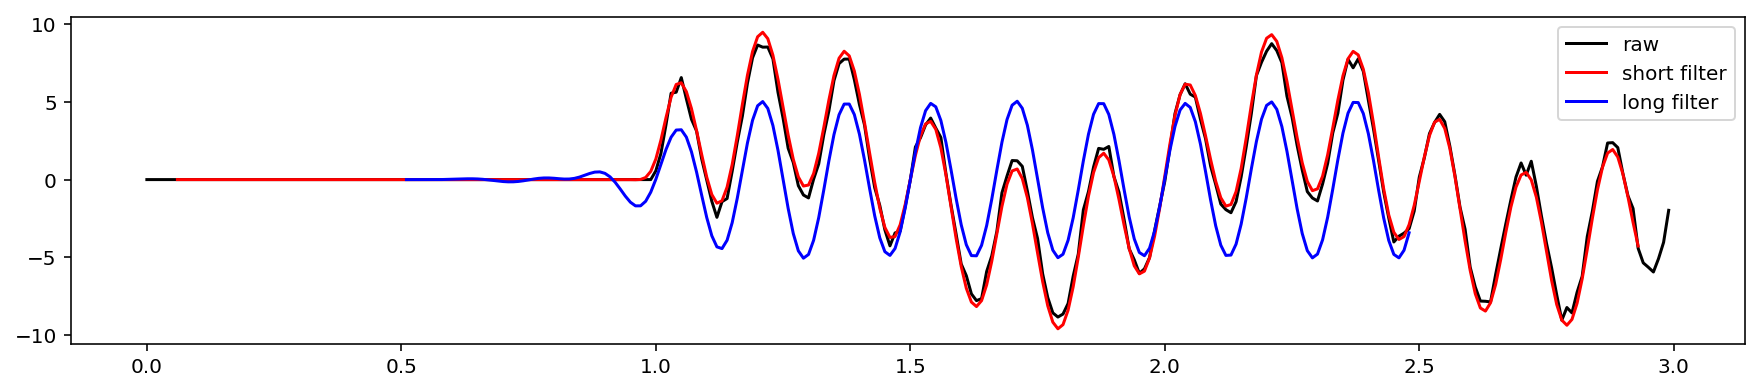

In [9]:
# Filter the data
x_filt_short = filt.filter_signal(x, fs, 'bandpass', fc=fc, n_seconds=.1)
x_filt_long = filt.filter_signal(x, fs, 'bandpass', fc=fc, n_seconds=1)

# Plot filtered signal
plt.figure(figsize=(15,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt_short, 'r', label='short filter')
plt.plot(t, x_filt_long, 'b', label='long filter')
plt.legend(loc='best')

/Users/rdgao/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


Short filter
Transition bandwidth is 9.9 Hz. Pass/stop bandwidth is 4 Hz


Long filter
Transition bandwidth is 1.4 Hz. Pass/stop bandwidth is 4 Hz


/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp-1.0.0-py3.6.egg/neurodsp/filt.py:198: UserWarning: The low frequency stopband never gets attenuatedby more than 20dB. Increase filter length.
  warnings.warn("The low frequency stopband never gets attenuated"\
/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp-1.0.0-py3.6.egg/neurodsp/filt.py:201: UserWarning: The high frequency stopband never gets attenuatedby more than 20dB. Increase filter length.
  warnings.warn("The high frequency stopband never gets attenuated"\
/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp-1.0.0-py3.6.egg/neurodsp/filt.py:250: UserWarning: Transition bandwidth is 9.9 Hz. This is greater than the desired pass/stop bandwidth of 4 Hz
  + str(np.round(pass_bw, 1)) + ' Hz')


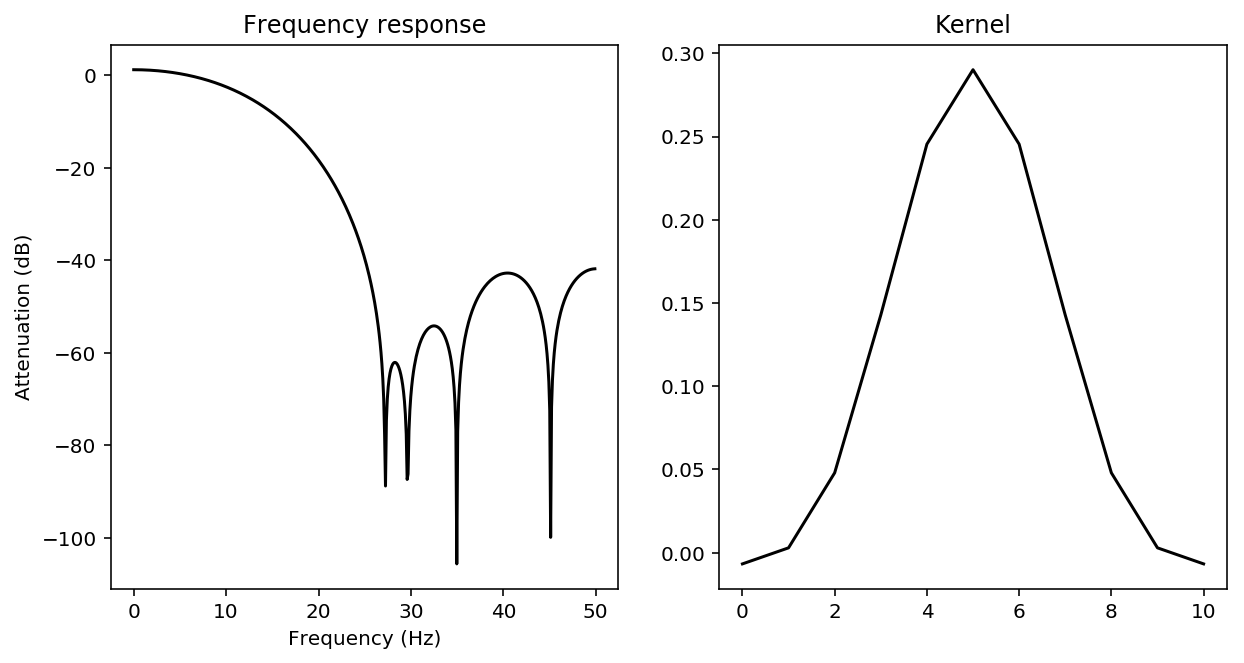

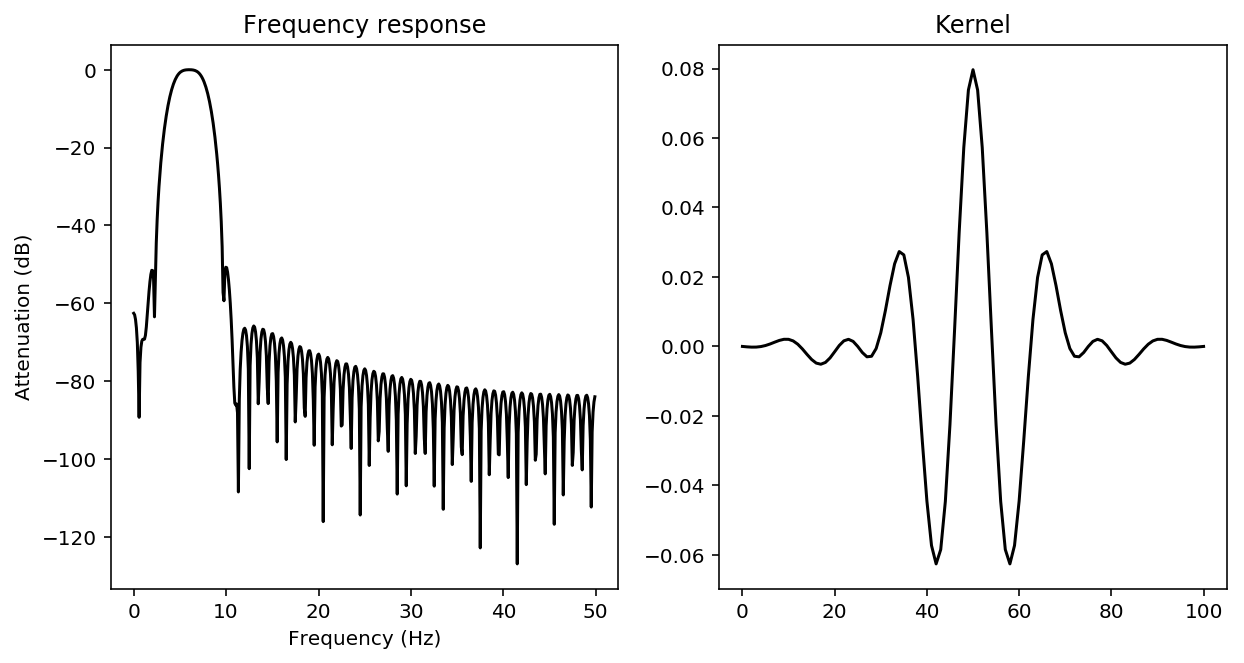

In [10]:
# Visualize the kernels and frequency responses
print('Short filter')
x_filt_short = filt.filter_signal(x, fs, 'bandpass', fc=fc, n_seconds=.1, plot_freq_response=True)
print('\n\nLong filter')
x_filt_long = filt.filter_signal(x, fs, 'bandpass', fc=fc, n_seconds=1, plot_freq_response=True)

# 4. Infinite impulse response (IIR) filter option

So far, the filters that we've been using are finite impulse response (FIR) filters. These filters are nice because we have good control over their properties (by manipulating the time-frequency resolution tradeoff through the filter length).

However, sometimes we may not be as concerned with the precise filter properties, and so there is a faster option: IIR filters. We often use these filters when removing 60Hz line noise.

Here we apply a 3rd order butterworth filter to remove 60Hz noise. Notice that some edge artifacts remain.

Transition bandwidth is 43.9 Hz. Pass/stop bandwidth is 100 Hz
Transition bandwidth is 1.0 Hz. Pass/stop bandwidth is 4 Hz


/Users/rdgao/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)
/Users/rdgao/anaconda3/lib/python3.6/site-packages/neurodsp-1.0.0-py3.6.egg/neurodsp/filt.py:111: UserWarning: Edge artifacts are not removed when using an IIR filter.
  warnings.warn('Edge artifacts are not removed when using an IIR filter.')
/Users/rdgao/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  

(0, 0.2)

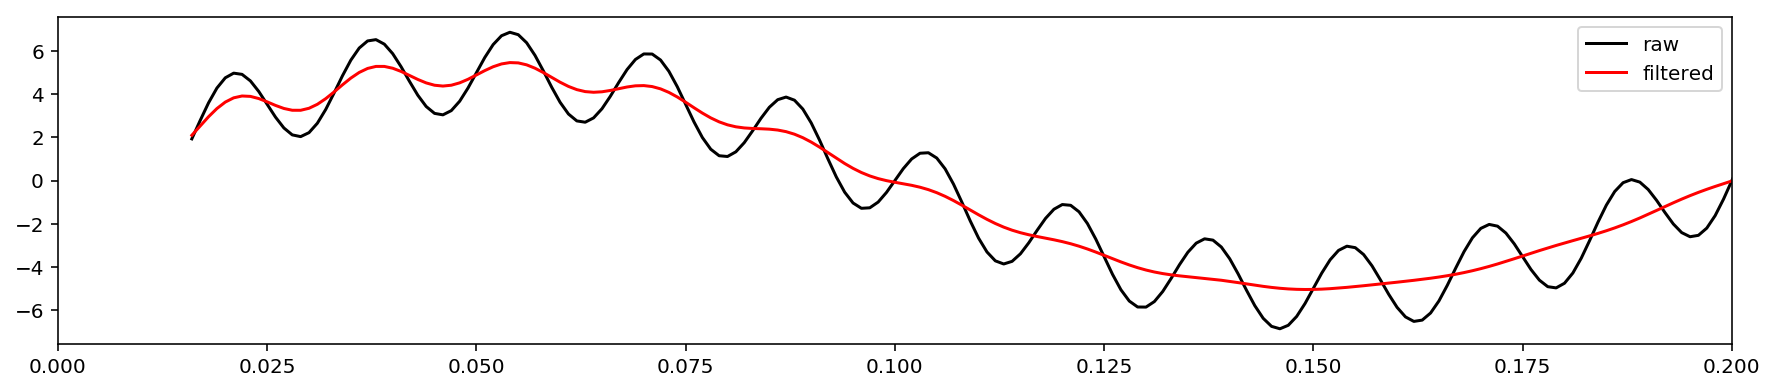

In [11]:
# Generate a signal with a low-frequency drift
np.random.seed(0)
t = np.arange(0,2,.001)
x = 5*np.sin(t*2*np.pi*5) + 2*np.sin(t*2*np.pi*60)
fs = 1000

# Low-pass filter the signal at 100Hz, just for fun.
x = filt.filter_signal(x, fs, 'lowpass', fc=100)

# Filter the data
fc = (58, 62)
x_filt = filt.filter_signal(x, fs, 'bandstop', fc=fc, iir=True, butterworth_order=3)

# Plot filtered signal
plt.figure(figsize=(15,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')
plt.xlim((0,.2))

# 5. Beta bandpass filter on neural signal

/Users/rdgao/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


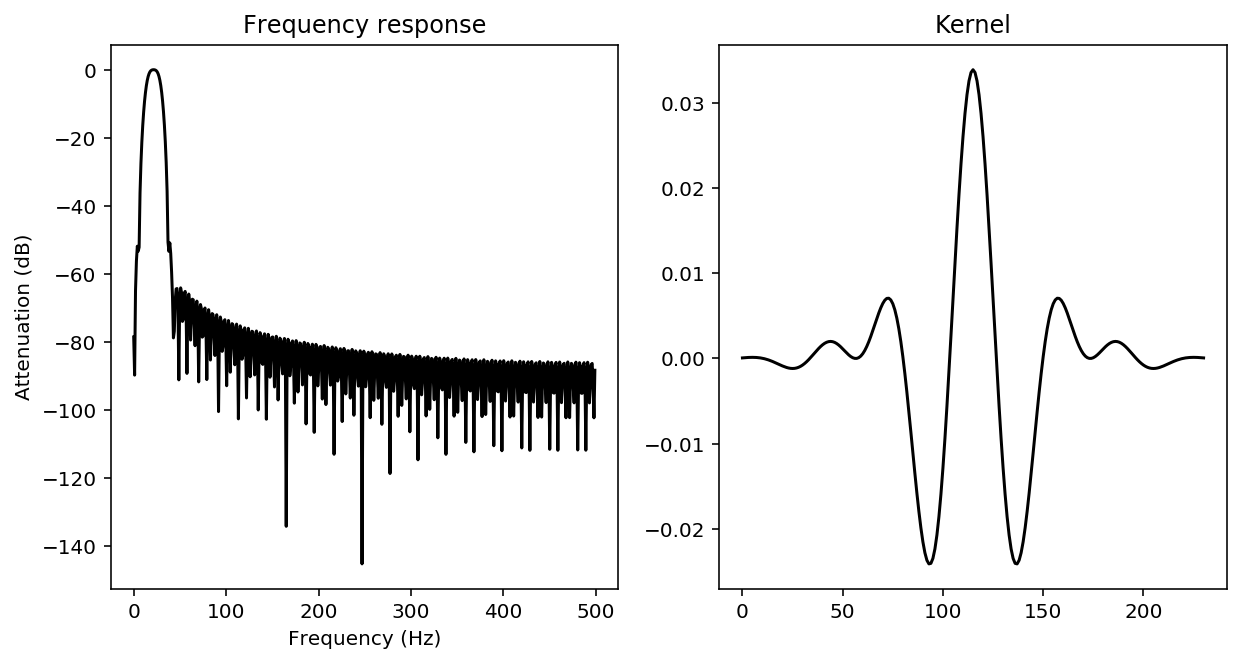

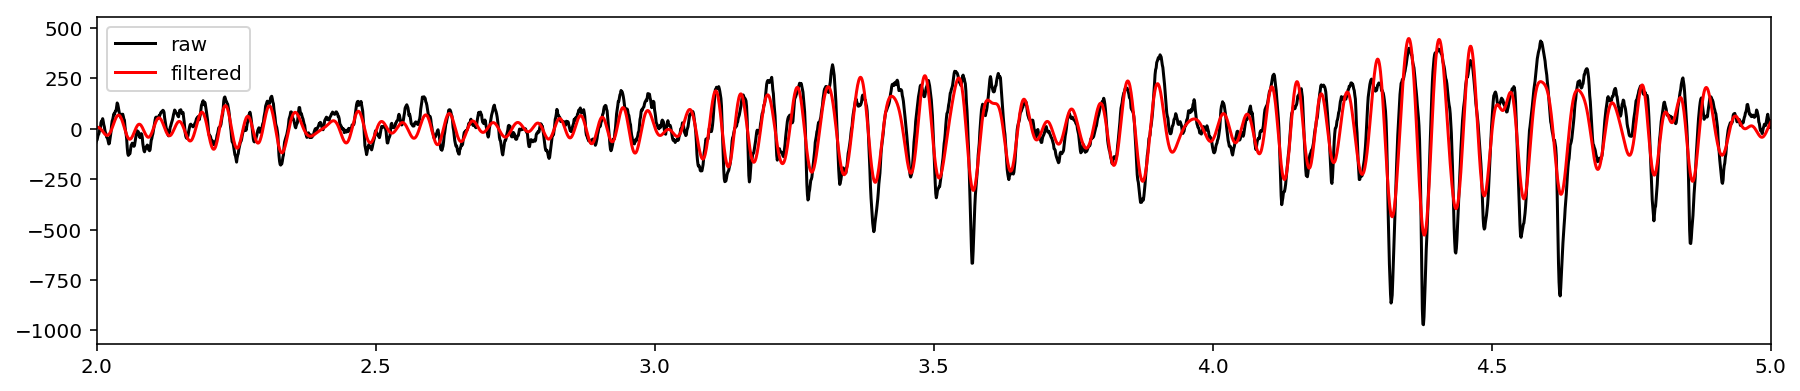

In [12]:
# Generate a signal with a low-frequency drift
x = np.load('./data/sample_data_1.npy')
fs = 1000
t = np.arange(0,len(x)/fs,1/fs)

# Filter the data
# If you want to get rid of the transition band printouts, set verbose=False
fc = (13, 30)
x_filt, kernel = filt.filter_signal(x, fs, 'bandpass', fc=fc, n_cycles=3,
                               plot_freq_response=True, return_kernel=True, verbose=False)

# Plot filtered signal
plt.figure(figsize=(15,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.xlim((2,5))
plt.legend(loc='best')

Notice that in the filtered time series, the resulting oscillation is more sinusoidal than it really is. Perhaps you should check out [bycycle](https://voytekresearch.github.io/bycycle/), our time-domain waveform shape rhythm analysis toolbox.